# Wine analysis


**Данные о файле:** https://www.kaggle.com/datasets/mysarahmadbhat/wine-tasting
        
**Описание переменных:**

    Country - страна (номинальная)
    Description - описание вкусовых качеств (номинальная)
    Designation - сорт вина/винограда
    Points - оценка дегустатора (сомелье) (метрическая абсолютная)
    Price - стоимость однйо бутылки (в долларах) (метрическая абсолютная)
    Province - штат/область производстства (номинальная)
    Region_1, Region_2 - регион, где выращивается виноград (номинальная)
    Tester_name - ФИО дегустатора (номинальная)
    Tester_twitter_handler - ник сомелье в twitter (*запрещено на территории Российской Федрации) (номинальная)
    Title - наименование вина (номинальная)
    Variety - разновидность вина/винограда (номинальная)
    Winery - название винодельни (номинальная)

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/79056/OneDrive/Рабочий стол/wine test/winemag-data-130k-v2.csv', index_col=0)
df.columns = df.columns.map(lambda x: x[0].upper() + x[1:]) # изменим первую букву в названии столбцов на заглавную.
df.head(10)

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Taster_name,Taster_twitter_handle,Title,Variety,Winery
id,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel


In [2]:
# Информация о типах данных столбцов, указание количества ненулевых (not NaN) данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Country                129908 non-null  object 
 1   Description            129971 non-null  object 
 2   Designation            92506 non-null   object 
 3   Points                 129971 non-null  int64  
 4   Price                  120975 non-null  float64
 5   Province               129908 non-null  object 
 6   Region_1               108724 non-null  object 
 7   Region_2               50511 non-null   object 
 8   Taster_name            103727 non-null  object 
 9   Taster_twitter_handle  98758 non-null   object 
 10  Title                  129971 non-null  object 
 11  Variety                129970 non-null  object 
 12  Winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [3]:
# Число пустых ячеек в каждом столбце
df.isna().sum()

Country                     63
Description                  0
Designation              37465
Points                       0
Price                     8996
Province                    63
Region_1                 21247
Region_2                 79460
Taster_name              26244
Taster_twitter_handle    31213
Title                        0
Variety                      1
Winery                       0
dtype: int64

Создадим новый столбец Satisfaction (категориальная порядковая переменная), показывающий степень удовлетворённости вкусовыми качествами вина на основе выставленной оценки.

In [4]:
def get_sat(x):
    if x < 80:
        return 'awful'
    elif x >=80 and x<85:
        return 'bad'
    elif x >= 85 and x <90:
        return 'good'
    elif x >= 90 and x < 95:
        return 'great'
    elif x >= 95 and x <= 100:
        return 'excellent'

df['Satisfaction'] = df['Points'].apply(get_sat)

# Выведем последние 10 строчек
df.tail(10)

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Taster_name,Taster_twitter_handle,Title,Variety,Winery,Satisfaction
id,,,,,,,,,,,,,,
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS,great
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano,great
129963,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,20.0,Galilee,NaN,NaN,Mike DeSimone,@worldwineguys,Dalton 2012 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton,great
129964,France,"Initially quite muted, this wine slowly develo...",Domaine Saint-Rémy Herrenweg,90,NaN,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Ehrhart 2013 Domaine Saint-Rémy Herren...,Gewürztraminer,Domaine Ehrhart,great
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,great
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),great
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,great
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,great
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,great


Возьмём срез датафрейма (25-50 наблюдения) и транспонируем его

In [5]:
df_slice = df[25:50]
df_slice.T

id,25,26,27,28,29,30,31,32,33,34,...,40,41,42,43,44,45,46,47,48,49
Country,US,Italy,Italy,Italy,US,France,Italy,Italy,US,US,...,Italy,US,France,US,Chile,US,Italy,US,US,France
Description,Oak and earth intermingle around robust aromas...,Pretty aromas of yellow flower and stone fruit...,"Aromas recall ripe dark berry, toast and a whi...","Aromas suggest mature berry, scorched earth, a...",Clarksburg is becoming a haven for Chenin Blan...,Red cherry fruit comes laced with light tannin...,Merlot and Nero d'Avola form the base for this...,"Part of the extended Calanìca series, this Gri...","Rustic and dry, this has flavors of berries, c...","This shows a tart, green gooseberry flavor tha...",...,Catarratto is one of Sicily's most widely farm...,"A stiff, tannic wine, this slowly opens and br...","This is a festive wine, with soft, ripe fruit ...","The clean, brisk mouthfeel gives this slightly...",A berry aroma comes with cola and herb notes. ...,Right out of the starting blocks this is an oa...,"Spicy, fresh and clean, this would pair with f...",This is a sweet wine with flavors of white sug...,This bottling resembles the New Zealand paradi...,"Soft and fruity, this is a generous, ripe wine..."
Designation,King Ridge Vineyard,Dalila,NaN,Mascaria Barricato,NaN,Nouveau,Calanìca Nero d'Avola-Merlot,Calanìca Grillo-Viognier,Puma Springs Vineyard,NaN,...,NaN,NaN,Nouveau,NaN,NaN,#SocialSecret,Sallier de la Tour,NaN,NaN,Eté Indien
Points,87,87,87,87,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
Price,69.0,13.0,10.0,17.0,16.0,NaN,NaN,NaN,50.0,20.0,...,17.0,22.0,9.0,14.0,9.0,40.0,13.0,13.0,16.0,14.0
Province,California,Sicily & Sardinia,Sicily & Sardinia,Sicily & Sardinia,California,Beaujolais,Sicily & Sardinia,Sicily & Sardinia,California,California,...,Sicily & Sardinia,Oregon,Beaujolais,California,Maule Valley,Virginia,Sicily & Sardinia,California,Virginia,Beaujolais
Region_1,Sonoma Coast,Terre Siciliane,Terre Siciliane,Cerasuolo di Vittoria,Clarksburg,Beaujolais-Villages,Sicilia,Sicilia,Dry Creek Valley,Sonoma Valley,...,Sicilia,Willamette Valley,Beaujolais,Paso Robles,NaN,Virginia,Sicilia,Lake County,Monticello,Brouilly
Region_2,Sonoma,NaN,NaN,NaN,Central Valley,NaN,NaN,NaN,Sonoma,Sonoma,...,NaN,Willamette Valley,NaN,Central Coast,NaN,NaN,NaN,NaN,NaN,NaN
Taster_name,Virginie Boone,Kerin O’Keefe,Kerin O’Keefe,Kerin O’Keefe,Virginie Boone,Roger Voss,NaN,NaN,NaN,NaN,...,NaN,Paul Gregutt,Roger Voss,NaN,Michael Schachner,NaN,NaN,NaN,NaN,Roger Voss
Taster_twitter_handle,@vboone,@kerinokeefe,@kerinokeefe,@kerinokeefe,@vboone,@vossroger,NaN,NaN,NaN,NaN,...,NaN,@paulgwine,@vossroger,NaN,@wineschach,NaN,NaN,NaN,NaN,@vossroger


Применим многоуровневую сортировку. Отсортируем датафрейм по уменьшению оценки, выставленной сомелье, а в случае совпадения оценок по увеличению стоимости одной бутылки данного вина.

In [6]:
df = df.sort_values(['Points', 'Price'], ascending=[False, True])
df.head(20)

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Taster_name,Taster_twitter_handle,Title,Variety,Winery,Satisfaction
id,,,,,,,,,,,,,,
113929,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,excellent
123545,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,excellent
58352,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton,excellent
45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,Napa,NaN,NaN,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,excellent
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,excellent
89728,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100,250.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer,excellent
36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug,excellent
111754,Italy,It takes only a few moments before you appreci...,Cerretalto,100,270.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri,excellent
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,excellent


***Цель работы:*** анализ рынка вин и выявление параметров, которые влияют на стоимость, полпулярность и качество вина.

***Задачи:***

    1. Проанализировать исходные данные датасета
    2. Выдвинуть гипотезы
    3. Выявить связи и закономерности между параметрами, используя средства анализа данных
    4. Проверить достоверность гипотез и сделать вывод

***Выдвигаемые гипотезы:***
    
    1. Большая часть винной продукции производится во Франции
    2. Самые дорогие вина изготавливаются в Италии
    3. Самые дешёвые вина производятся в Чили
    4. Среди самых опытных дегустаторов (топ-10) преобладают мужчины
    5. Вина с более дорогими ценниками будут иметь более высокие баллы
    6. Cabernet Sauvignon (Каберне Совиньон) является самой популярной разновидностью винограда
    7. Самой крупная винодельня находится в Испании
    8. Качество вина (его оценка) зависит от региона его производства
    9. Французское вино имеет самый высокий рейтинг среди всех вин (в анализируемом датасете)
    10. Общая стоимость вина, производимого в Италии и Франции превышает суммарную цену вина, производимого в остальном мире
    11. Популярные сорта винограда имеют более высокую стоимость.
    

1. Диаграмма (piechart) зависимости количества производимого вина от страны. Так как в датасете представлено большое количество стран, построим круговую диаграмму на основе данных о 10 странах с наибольшим количеством рецензий.

Text(0.5, 1.25, 'Top 10 Countries in the Dataset')

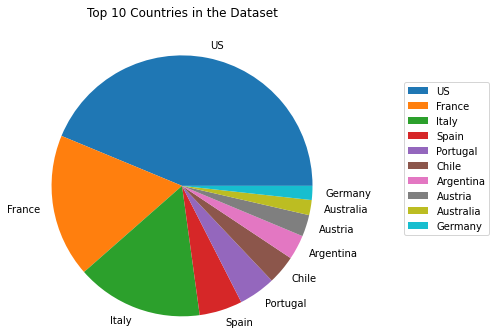

In [7]:
import matplotlib.pyplot as plt
country_counts = df['Country'].value_counts()[:10]    
plt.pie(country_counts, labels=country_counts.index, radius=1.5)    
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1.0))
plt.title('Top 10 Countries in the Dataset', x=0.5, y=1.25)

По данным диаграммы, большая часть рецензированного вина производится в США, а Франция занимает второе место. Следовательно, первая гипотеза неверна.

2. Построим сводную таблицу средней стоимости вина с группировкой по стране.

In [8]:
df1 = df.groupby('Country')[['Price']].mean()
df1.head(10)

,Price
Country,
Argentina,24.510117
Armenia,14.500000
Australia,35.437663
Austria,30.762772
Bosnia and Herzegovina,12.500000
Brazil,23.765957
Bulgaria,14.645390
Canada,35.712598
Chile,20.786458


Text(0.5, 0, 'Country')

<Figure size 432x288 with 0 Axes>

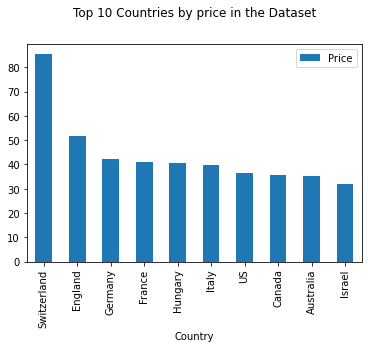

In [9]:
# Построим столбчатую диаграмму 
countries = df1.sort_values(by='Price', ascending=False)[:10]
plt.figure()
countries.plot(kind="bar")
plt.title('Top 10 Countries by price in the Dataset',x=0.5, y=1.1)
plt.xlabel('Country')

Видно, что самая дорогая средняя стоимость вина в Швейцарии, а Италия занимает лишь 6 место по стоимости вина. Следовательно, гипотеза снова неверна.

3. Используя сводную таблицу из прошлого пункта, построим столбчатую диаграмму стран с самой самой маленькой средней стоимостью вин.

Text(0.5, 0, 'Country')

<Figure size 432x288 with 0 Axes>

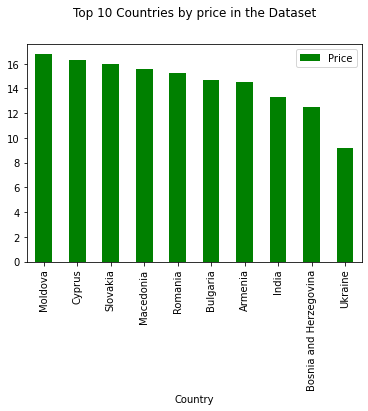

In [10]:
countries = df1.sort_values(by='Price')[:10][::-1]
plt.figure()
countries.plot(kind="bar", color='green')
plt.title('Top 10 Countries by price in the Dataset',x=0.5, y=1.1)
plt.xlabel('Country')

Заметно, что вино из Украины является в среднем самым дешёвым, а Чили не входит даже в топ-10 стран с самой низкой средней стоимостью вина. Поэтому гипотеза снова неверна.

4. Посчитаем количество рецензий на вина у каждого дегустатора, выберем 10 самых популярных для анализа. Так как изначально в таблице нет пола дегустатора, создадим функцию, которая будет проверять наличие имени в списке женских имен.

In [11]:
def GetName(person):
    name = person.split()[0]

    if name in woman:
        return "female"
    else:
        return "male"

In [12]:
# Создадим датафрейм
top_10_tasters = pd.DataFrame(df['Taster_name'].value_counts().head(10))
top_10_tasters.rename(columns = {'Taster_name':'Reviews'}, inplace = True )
top_10_tasters.index.name = "Name"

# Женские имена
woman = ['Virginie', 'Anna']

# Добавим столбец
top_10_tasters['Gender'] = ''

j = 0
for index, row in top_10_tasters.iterrows(): 
    top_10_tasters['Gender'][j] = GetName(index)
    j+=1

top_10_tasters

C:\Users\79056\AppData\Local\Temp\ipykernel_9336\2377703447.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_tasters['Gender'][j] = GetName(index)


,Reviews,Gender
Name,,
Roger Voss,25514,male
Michael Schachner,15134,male
Kerin O’Keefe,10776,male
Virginie Boone,9537,female
Paul Gregutt,9532,male
Matt Kettmann,6332,male
Joe Czerwinski,5147,male
Sean P. Sullivan,4966,male
Anna Lee C. Iijima,4415,female


In [13]:
df_gender = top_10_tasters.groupby('Gender')[['Reviews']].sum()
df_gender

,Reviews
Gender,
female,13952
male,81578


Text(0.5, 1.1, 'Reviews by gender')

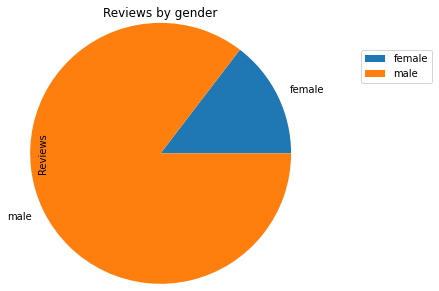

In [14]:
df_gender.plot(kind="pie", subplots=True, radius=1.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.4, 1.0))
plt.title('Reviews by gender', x=0.5, y=1.1)

По диаграмме видно, что большая часть рецензий на вино была написана мужчинами. Следовательно, наша гипотеза подтверждена.

5. Рассчитаем коэффициент корреляции Пирсона для того, чтобы проверить, существует ли взаимосвязь между ценой вина и его оценкой

In [15]:
df['Price'].corr(df['Points']) 

0.4161667418606222

В соответствии со шкалой корреляции, взаимосвязь между стоимостью вина и его оценкой слабая положительная, то есть не всякое дорогое вино имеет высокие оценки

6. Узнаем, какие разновидности винограда являются самыми популярными. Выведем топ-10 самых распространенных вин и посмотрим, есть ли среди них Cabernet Sauvignon.

In [16]:
wine_varieties = df['Variety'].value_counts()[:15]   
wine_varieties

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Sangiovese                   2707
Malbec                       2652
Portuguese Red               2466
Name: Variety, dtype: int64

Выбранное нами вино оказалось лишь на третьем месте по популярности, а значит, наша гипотеза неверна.

7. Построим частотную таблицу, отсортированную по убыванию частот, в которой будет указно количества вин, производимых той или иной винодельней

In [17]:
df_7 = df['Winery'].value_counts().to_frame().head(10)
df_7

,Winery
Wines & Winemakers,222
Testarossa,218
DFJ Vinhos,215
Williams Selyem,211
Louis Latour,199
Georges Duboeuf,196
Chateau Ste. Michelle,194
Concha y Toro,164
Columbia Crest,159
Kendall-Jackson,130


Выясним, в какой стране расположена самая популярная винодельня Wines & Winemakers

In [18]:
df[df['Winery'] == 'Wines & Winemakers'].iloc[[0]]['Country']

id
3843    Portugal
Name: Country, dtype: object

Wines & Winemakers расположена в Португалии, то есть наша гипотеза о том, что самая популярная винодельня находится в Испании неверна.

8. Рассчитаем корреляцию между оценкой вина и страной, в которой оно производится. Для того, чтобы рассчитать корреляцию, перекодируем название страны в число с сохранением текстовых меток с помощью метода Categorial, создав для этого отдельный столбец

In [19]:
df['Country_cat'] = df['Country']
df['Country_cat'] = pd.Categorical(df['Country_cat'])
df['Country_cat'] = df['Country_cat'].cat.codes

Рассчитаем корреляцию

In [20]:
df['Country_cat'].corr(df['Points'])

0.009950413387261605

Значение коэффициента корреляции ~ 0.01, то есть очень слабая положительная корреляция, то есть в большинстве своем связи между оценкой качества вина и регионом его производства нет

9. Построим сводную таблицу, чтобы выяснить, вино из каких стран имеет самую высокую оценку

In [21]:
df_9 = df.groupby('Country')[['Points']].mean()
df_9 = df_9.sort_values(by='Points', ascending=False).head(10)[::-1]
df_9

,Points
Country,
Australia,88.580507
Luxembourg,88.666667
France,88.845109
China,89.000000
Hungary,89.191781
Canada,89.369650
Germany,89.851732
Austria,90.101345
India,90.222222


Визуализируем данные

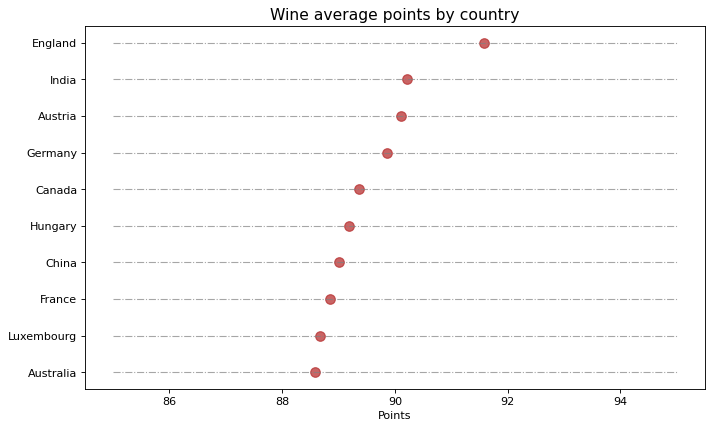

In [22]:
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.hlines(y=df_9.index, xmin = 85, xmax = 95, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df_9.index, x=df_9.Points, s=75, color='firebrick', alpha=0.7)

ax.set_title('Wine average points by country', fontdict={'size':14})
ax.set_xlabel('Points')
plt.show()

Видно, что вина из топ-10 стран имеют практически идентичный рейтинг, однако вино из Англии является самым высокооцениваемым среди остальных. Поэтому наша гипотеза вновь неверна.

10. Построим сводную таблицу стоимости вина в разных странах, вычислим суммарную стоимость вина в Италии и Франции и сравним её со стоимостью вина, производимого в остальном мире.

In [23]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


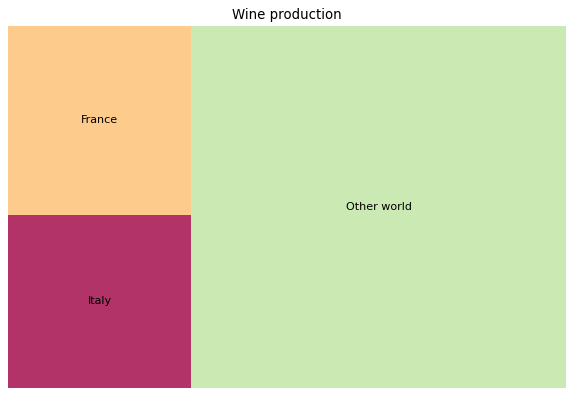

In [24]:
df_10 = df.groupby('Country')[['Price']].sum().sort_values('Price', ascending=False)
sum_Italy = df_10.loc['Italy']
sum_France = df_10.loc['France']
sum_total = df['Price'].sum() - sum_Italy - sum_France

import squarify 

labels = ['Italy', 'France', 'Other world']
sizes = [sum_Italy, sum_France, sum_total]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(9,6), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Wine production')
plt.axis('off')
plt.show()

Заметим, что общая цена вина, продаваемого в остальном мире, превышает цену вина, прозводимого в Италии и Франции. Значит, гипотеза неверна.

11. Построим сводную таблицу самых популярных сортов винограда и их стоимости

In [25]:
grape_varieties = df.groupby('Variety')[['Price']].mean()
grape_varieties.sort_values('Price', ascending=False).head(10)

,Price
Variety,
Ramisco,495.000000
Terrantez,236.000000
Francisa,160.000000
Rosenmuskateller,150.000000
Malbec-Cabernet,113.333333
Tinta Negra Mole,112.000000
Muscadelle,111.200000
Bual,100.000000
Debit,98.333333


Мы уже выяснили, что самыми популярными сортами винограда являются Pinot Noir, Chardonnay и Cabernet Sauvignon, однако их нет в топе самых дорогих сортов. Значит, гипотеза неверна

# Описательные статистики

**Рассчитаем описательную статистику для столбцов Points и Price**

In [26]:
df[['Points', 'Price']].describe()

,Points,Price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


Данная статистика показывает, что средняя оценка, полученная вином, равна ~88 баллов, средняя цена - 35 долларов за бутылку. Минимальная оценка составляет 80 баллов, а минимальная стоимость - 4 доллара. Среднеквадратичное отклонение составляет 3 балла по оценке и 41 доллар по цене. Более подробная информация по квартилям и перцентилям представлена в таблице. Например, среди первых 50% наблюдений средний балл составляет 88, а стоимость - 25 долларов за бутылку.
***
**Найдем самый часто встречаемый балл (моду по баллам)**

In [27]:
df[['Points']].mode()

,Points
0,88


Наиболее распространённый балл - 88
***
**Найдем самый часто встречаему цену (моду по цене)**

In [28]:
df[['Price']].mode()

,Price
0,20.0


Самая частая цена - 20 долларов
***
**Рассчитаем медиану по цене вина**

In [29]:
df[['Price']].median()

Price    25.0
dtype: float64

Медиана (средняя цена в упорядоченном наборе цен) равна 25
***
**Рассчитаем медиану по оценке вина**

In [30]:
df[['Points']].median()

Points    88.0
dtype: float64

Медиана (средняя оценка в упорядоченном наборе оценок) равна 88. Обратим внимание, что здесь она совпадает с модой и практически совпадает со средним значением оценки
***
**Построим распределение баллов, полученных вином и сравним его с нормальным**

C:\Users\79056\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

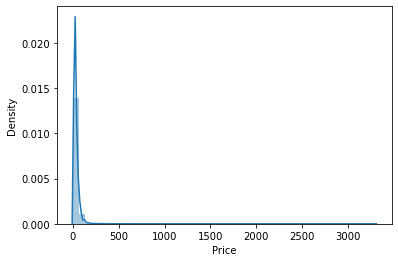

In [31]:
import seaborn as sns
sns.distplot(df.Price.dropna())  

C:\Users\79056\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

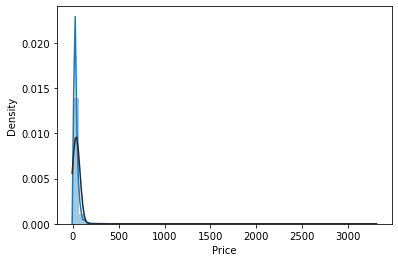

In [32]:
# из пакета для работы со статистическими данными и моделями импортируем команду, которая задает нормальное распределение
from scipy.stats import norm

sns.distplot(df.Price.dropna(), fit=norm)

Видно, что в целом распределение симметричное, однако присутствует заострённость (островершинное распределение)

***
### Выводы ###

**Анализ гипотез**

1. Большая часть винной продукции производится во Франции - опровергнута. Франция безусловно является крупным экспортёром вина, однако территория страны не слишком большая для расположения огромного числа виноградников.
***
2. Самые дорогие вина изготавливаются в Италии - опровергнута. Итальянское вино входит в топ-10 стран с самым дорогим вином, однако в связи с более высоким уровнем цен в Швейцарии, швейцарское вино стоит намного дороже.
***
3. Самые дешёвые вина производятся в Чили - опровергнута. В связи с особым геоположением страны, там произрастают более дорогие сорта винограда, что влияет на цену.
***
4. Среди самых опытных дегустаторов (топ-10) преобладают мужчины - подтверждена. Мужчины часто предпочитают дорогой алкоголь, поэтому они пробуют больше вина, чтобы найти лучший сорт для себя.
***
5. Вина с более дорогими ценниками будут иметь более высокие баллы - опровергнута. На стоимость вина влияет сорт винограда, а также возраст, сложность процесса изготовления, однако его вкусовые качества не всегда определяются ценой.
***
6. Cabernet Sauvignon (Каберне Совиньон) является самой популярной разновидностью винограда - опровергнута. Безусловно, каберне является одной из самых известных разновидностей винограда, однако многие люди предпочитают именно Pinot Noir, так как этот виноград имеетя яркий ягодный аромат и кисло-сладкие фруктовые ноты во вкусе.
***
7. Самой крупная винодельня находится в Испании - опровергнута. В Испании есть множество небольших виноделен, которые производят великолепное вино, однако в Португалии существуют крупные винодельни, так как Португалия имеет большую площадь суши, доступную для выращивания винограда, и более долгую историю виноделия.
***
8. Качество вина (его оценка) зависит от региона его производства - опровергнута. В разных регионах могут производить одинаково хорошее вино.
***
9. Французское вино имеет самый высокий рейтинг среди всех вин (в анализируемом датасете) - опровергнуто. Английкое вино является более редким и благородным благодаря особому прохладному климату, теруару и технологиям производства. Вина получаются с ярким и интенсивным вкусом.
***
10. Общая стоимость вина, производимого в Италии и Франции превышает суммарную цену вина, производимого в остальном мире - опровергнута. Суммарная стоимость вин, продаваемых в других странах, превышает стоимость Итальянского и Французского вина, так как суммарные объемы производства вина остального мира больше.
***
11. Популярные сорта винограда имеют более высокую стоимость - опровергнута. Как правило, самые дорогие сорта являются элитными и распространены в узком кругу лиц.

**Общие выводы**

В ходе исследования мы проанализировали рынок вин и выяснили, что на популярность и стоимость вина влияет сорт винограда, и не влияет регион производства. Все задачи были выполнены.